In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import tweepy
import json
import re
import os
import sys

### Data Gathering, Part 1: Twitter Archive

In [2]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')

#### Twitter Archive Visual Assessment

In [3]:
df1.shape

(2356, 17)

In [4]:
df1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [6]:
df1.head(8)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,8.924210e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,8.921770e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,8.918150e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,8.916900e+17,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,8.913280e+17,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,8.910880e+17,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,8.909720e+17,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,8.907290e+17,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None


In [7]:
df1.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,6.660490e+17,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,6.660440e+17,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,6.660330e+17,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,6.660290e+17,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,6.660210e+17,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


#### Twitter Archive Programmatic Assessment

In [8]:
# Let's check how many unique tweet ID's are included in this data set.
df1['tweet_id'].nunique()

2349

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null float64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(5), int64(2), 

In [12]:
# Let's make sure that the 'doggo' and 'floofer' columns only have 'None' or their respective labels.
print(df1.doggo.unique())
print(df1.floofer.unique())

['None' 'doggo']
['None' 'floofer']


In [13]:
print(df1.doggo.value_counts())
print(df1.floofer.value_counts())
print(df1.pupper.value_counts())
print(df1.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


In [14]:
df1.duplicated().sum()

0

In [15]:
# The 'text' column appears to the be the only column with no duplicates.
df1['text'].duplicated().sum()

0

#### Twitter Archive Cleaning and Tidiness Issues Found:
##### Data Quality:
- tweet_id needs to be converted to a string
- retweeted columns need to be converted to strings
- timestamp columns need to be converted to a datetime format
- names such as 'a' and 'such' should be changed to 'None'
- in the 'text' column the url should be separated from the actual tweet
- some of the rating numerators are way outside of the range that we would expect so this will need to be corrected
- some of the rating denominators are numbers other than 10 so we will need to set them to 10
- some of the 'text' columns indicate a dog name but that name is missing from the 'name' column

##### Tidiness:
- we may want to melt the 'doggo', 'pupper', etc. columns into a single column

### Data Gathering, Part 2: Image Predictions archive

In [16]:
# Import of image predictions file.
predicted_breeds_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(predicted_breeds_url)
with open('image_predictions.tsv', 'wb') as f:
    f.write(response.content)

In [17]:
df2 = pd.read_csv('image_predictions.tsv', sep='\t')

#### The following items are explanations of the image predictions as provided by Udacity:

- tweet_id is the last part of the tweet URL after "status/" →   https://twitter.com/dog_rates/status/889531135344209921


- p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever


- p1_conf is how confident the algorithm is in its #1 prediction → 95%


- p1_dog is whether or not the #1 prediction is a breed of dog → TRUE


- p2 is the algorithm's second most likely prediction → Labrador retriever


- p2_conf is how confident the algorithm is in its #2 prediction → 1%


- p2_dog is whether or not the #2 prediction is a breed of dog → TRUE

#### Image Predictions Visual Assessment

In [18]:
df2.shape

(2075, 12)

In [19]:
df2.head(8)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False


#### Image Predictions Programmatic Assessment

In [20]:
print(df2.p1_dog.value_counts())
print(df2.p2_dog.value_counts())
print(df2.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
# I would like to look at what particular dog breeds appear multiple times.  This may be useful in our analysis.
print(df2.p1.value_counts()[0:5])
print(df2.p2.value_counts()[0:5])
print(df2.p3.value_counts()[0:5])

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
Name: p1, dtype: int64
Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
Name: p2, dtype: int64
Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
Name: p3, dtype: int64


In [23]:
# Note that all tweet_id's in this DataFrame are unique.
df2.tweet_id.nunique()

2075

#### Image Predictions Cleaning and Tidiness Issues Found:
##### Data Quality:
- the image prediction number 'img_num' should be converted to a string

##### Tidiness:
- we will need to merge this DataFrame with df1

### Data Gathering, Part 3: Retweets and Likes via Twitter API

In [14]:
import tweepy
consumer_key = '#####%%%%%$$#####'
consumer_secret = '#####%%%%%$$#####@@@@@@@@######'
access_token = '#####%%%%%$$#####@@@@@@@@######&&&&&&&'
access_secret = '#####%%%%%$$#####@@@@@@@@######'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

The following StackOverflow link was helpful for obtaining likes and retweets:

https://stackoverflow.com/questions/45761253/how-do-i-ge-tthe-number-of-likes-on-a-tweet-via-tweepy

We will create short lists with each tweet's favorites and retweets and then use a dictionary format to create a third DataFrame named *df3*.

In [15]:
# samples:
tweet0 = api.get_status(df2['tweet_id'][0])
tweet1 = api.get_status(df2['tweet_id'][1])
print(tweet0.retweet_count, tweet0.favorite_count, '\n')
print(tweet1.retweet_count, tweet1.favorite_count, '\n')

498 2531 

46 126 



The following sections of code pull the counts of retweets and favorites for the Tweet ID's in our Image Predictions file.  I found it necessary to write multiple iterations of the same code in order to pull the data little by little and avoid a rate limit error from the Twitter API.

In [16]:
retweet_list1 = []
for i in df2['tweet_id'][0:300]:
    try:
        tweet_info = api.get_status(i)
        retweet_list1.append(tweet_info.retweet_count)
    except:
        retweet_list1.append(0)

In [17]:
retweet_list2 = []
for i in df2['tweet_id'][300:600]:
    try:
        tweet_info = api.get_status(i)
        retweet_list2.append(tweet_info.retweet_count)
    except:
        retweet_list2.append(0)

In [18]:
retweet_list3 = []
for i in df2['tweet_id'][600:900]:
    try:
        tweet_info = api.get_status(i)
        retweet_list3.append(tweet_info.retweet_count)
    except:
        retweet_list3.append(0)

In [19]:
retweet_list4 = []
for i in df2['tweet_id'][900:1200]:
    try:
        tweet_info = api.get_status(i)
        retweet_list4.append(tweet_info.retweet_count)
    except:
        retweet_list4.append(0)

In [20]:
retweet_list5 = []
for i in df2['tweet_id'][1200:1500]:
    try:
        tweet_info = api.get_status(i)
        retweet_list5.append(tweet_info.retweet_count)
    except:
        retweet_list5.append(0)

In [21]:
retweet_list6 = []
for i in df2['tweet_id'][1500:1800]:
    try:
        tweet_info = api.get_status(i)
        retweet_list6.append(tweet_info.retweet_count)
    except:
        retweet_list6.append(0)

In [37]:
retweet_list7 = []
for i in df2['tweet_id'][1800:]:
    try:
        tweet_info = api.get_status(i)
        retweet_list7.append(tweet_info.retweet_count)
    except:
        retweet_list7.append(0)

In [64]:
retweet_complete = retweet_list1 + retweet_list2 + retweet_list3 + retweet_list4 + retweet_list5 + retweet_list6 + \
    retweet_list7

In [39]:
favorite_list1 = []
for i in df2['tweet_id'][0:300]:
    try:
        tweet_info = api.get_status(i)
        favorite_list1.append(tweet_info.favorite_count)
    except:
        favorite_list1.append(0)

In [47]:
favorite_list2 = []
for i in df2['tweet_id'][300:600]:
    try:
        tweet_info = api.get_status(i)
        favorite_list2.append(tweet_info.favorite_count)
    except:
        favorite_list2.append(0)

In [48]:
favorite_list3 = []
for i in df2['tweet_id'][600:900]:
    try:
        tweet_info = api.get_status(i)
        favorite_list3.append(tweet_info.favorite_count)
    except:
        favorite_list3.append(0)

In [49]:
favorite_list4 = []
for i in df2['tweet_id'][900:1200]:
    try:
        tweet_info = api.get_status(i)
        favorite_list4.append(tweet_info.favorite_count)
    except:
        favorite_list4.append(0)

In [50]:
favorite_list5 = []
for i in df2['tweet_id'][1200:1500]:
    try:
        tweet_info = api.get_status(i)
        favorite_list5.append(tweet_info.favorite_count)
    except:
        favorite_list5.append(0)

In [62]:
favorite_list6 = []
for i in df2['tweet_id'][1500:1800]:
    try:
        tweet_info = api.get_status(i)
        favorite_list6.append(tweet_info.favorite_count)
    except:
        favorite_list6.append(0)

In [63]:
favorite_list7 = []
for i in df2['tweet_id'][1800:]:
    try:
        tweet_info = api.get_status(i)
        favorite_list7.append(tweet_info.favorite_count)
    except:
        favorite_list7.append(0)

In [65]:
favorites_complete = favorite_list1 + favorite_list2 + favorite_list3 + favorite_list4 + favorite_list5 + \
    favorite_list6 + favorite_list7

In [69]:
df3 = pd.DataFrame({'tweet_id': df2['tweet_id'], 'retweet_count': retweet_complete, 'favorite_count': favorites_complete})

In [72]:
df2_tweet_ids = df2['tweet_id'].tolist()

In [73]:
likes_dictionary = {'tweet_id': df2_tweet_ids, 'retweet_count': retweet_complete, 'favorites_count': favorites_complete}

I found the following article helpful in working with json files and dictionaries:

https://stackoverflow.com/questions/42825102/how-to-save-python-dictionary-into-json-files

In [74]:
# Let's store this information in a JSON text file.
jsonarray = json.dumps(likes_dictionary)

In [75]:
with open('tweet_json.txt', "w") as fp:
    json.dump(jsonarray, fp)

I stored the retweet and favorite data in an Excel sheet in addition to the JSON .txt file.  Also, for ease of use there is a read_excel file below so that the data can be brought in quickly and easily of the Jupyter Notebook is closed and restarted.

In [25]:
df3.to_excel('retweet_output.xlsx', index=False)

In [26]:
df3 = pd.read_excel('retweet_output.xlsx')

#### Twitter API Data Visual and Programmatic Assessment

In [27]:
df3.shape

(2075, 3)

In [28]:
df3.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

In [30]:
df3.tail()

,tweet_id,retweet_count,favorite_count
2070,891327558926688256,9120,39425
2071,891689557279858688,8421,41254
2072,891815181378084864,4051,24519
2073,892177421306343424,6115,32558
2074,892420643555336192,8278,37900


In [31]:
# Let's check the averages.
df3['retweet_count'].mean(), df3['favorite_count'].mean()

(2777.757108433735, 8342.715662650602)

### Data Cleaning

In [32]:
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

Cleaning step 1: Convert tweet_id in all three DataFrames to a string

In [33]:
df1_clean['tweet_id'] = df1_clean['tweet_id'].astype(str)
df2_clean['tweet_id'] = df2_clean['tweet_id'].astype(str)
df3_clean['tweet_id'] = df3_clean['tweet_id'].astype(str)

Cleaning step 2: Convert 'retweeted' columns in df1 to a strings

In [35]:
df1_clean['retweeted_status_id'] = df1_clean['retweeted_status_id'].astype(str)
df1_clean['retweeted_status_user_id'] = df1_clean['retweeted_status_user_id'].astype(str)

Cleaning step 3: Convert timestamps from a string to a time format

In [36]:
df1_clean['timestamp'] = pd.to_datetime(df1_clean['timestamp'])
df1_clean['retweeted_status_timestamp'] = pd.to_datetime(df1_clean['retweeted_status_timestamp'])

In [37]:
# Let's test the first three cleaning items above.
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetim

Cleaning step 4: Convert image number from an integer to a string

In [25]:
df2_clean['img_num'] = df2_clean['img_num'].astype(str)

In [38]:
# Verification:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


Cleaning step 5: Update some of the names in the 'name' column

In [41]:
df1_clean['name'].replace(['a', 'an', 'such', 'the', 'quite'], 'None', inplace=True)

In [50]:
# Verification of the code above.  The terms replaced should be zero and one name in the column should be greater 
#   than 1:

df1_clean.query("name == 'a'")['name'].count(), df1_clean.query("name == 'an'")['name'].count(), \
df1_clean.query("name == 'the'")['name'].count(), df1_clean.query("name == 'quite'")['name'].count(), \
df1_clean.query("name == 'Charlie'")['name'].count()

(0, 0, 0, 0, 12)

Cleaning step 6: Split the weblink section of the 'text' column into its own separate column.  This will be helpful if we search for terms or do any other specific work on the 'text' column.

In [51]:
df1_clean['tweet_link'] = df1_clean['text'].str.extract(r'(https://t.co/\w*)')

In [52]:
df4 = df1_clean.text.str.partition(' https://')

In [53]:
df4.shape

(2356, 3)

In [54]:
df4.rename(columns={0: 'text_section'}, inplace=True)
df4.drop([1, 2], axis=1, inplace=True)

In [55]:
# Let's add this 'text_section' column to df1.
df1_new = pd.concat([df1_clean, df4], axis=1)
df1_new.drop('text', axis=1, inplace=True)

In [57]:
# Verification:
df1_new.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'tweet_link', 'text_section'],
      dtype='object')

Cleaning Step 7: Set the rating numerators to a certain minimum and maximum.  After reviewing a number of entries in the 'text' column it appears that the minimum can remain at zero, but the maximum should be set to 15.

In [59]:
print('current min:', min(df1_new['rating_numerator']))
print('current max:', max(df1_new['rating_numerator']))

current min: 0
current max: 1776


In [60]:
rating_num = df1_new['rating_numerator'].tolist()

In [61]:
rating_numerator_updated = [min(x, 15) for x in rating_num]

In [62]:
# We will verify this step and the next one below.
df1_new['rating_numerator_clean'] = rating_numerator_updated
df1_new.drop(['rating_numerator'], axis=1, inplace=True)

Cleaning Step 8: Set the rating denominators to 10.

In [63]:
df1_new.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [64]:
rating_denom = df1_new['rating_denominator'].tolist()

In [65]:
df1_new['rating_denominator_clean'] = df1_new['rating_denominator'].where(df1_new['rating_denominator'] == 10, 10)

In [66]:
df1_new.rating_denominator_clean.value_counts()

10    2356
Name: rating_denominator_clean, dtype: int64

In [67]:
df1_new.drop('rating_denominator', axis=1, inplace=True)

In [69]:
# Verification of steps 8 and 9:
df1_new.rating_denominator_clean.value_counts(), df1_new.rating_numerator_clean.value_counts()

(10    2356
 Name: rating_denominator_clean, dtype: int64, 12    558
 11    464
 10    461
 13    351
 9     158
 8     102
 7      55
 14     54
 5      37
 6      32
 15     28
 3      19
 4      17
 1       9
 2       9
 0       2
 Name: rating_numerator_clean, dtype: int64)

Cleaning Step 9: Obtain correct tweet_id's.  The tweet_id's in the 'tweet_id' column of the twitter-archive-enhanced are incomplete.  In order to join or merge our data frames on the tweet_id column we will need to have consistency in this column.

In [70]:
df1_new['tweet_id'] = df1_new['expanded_urls'].str.extract(r'(\d{18})')

Cleaning Step 10: Let's see if we can make some updates to the 'name' column since there are a number of cases where the dog's name can be found in the 'text' column but not the name column.  At the very least I would like to see if the dog is named or not since that will be useful in our analysis later.

In [71]:
name_in_text = []

for text in range(df1_new.shape[0]):
    try:
        # what are we searching for?
        word1 = re.compile(r'name(.*)')
        # where are we searching?
        mo1 = word1.search(df1_new.text_section[text])
        name1 = mo1.group()
        name_in_text.append(name1)
    except:
        name_in_text.append('')

In [72]:
df1_new['name2'] = name_in_text

In [73]:
has_name = []

for i in range(df1_new.shape[0]):
    if (df1_new['name'][i] == 'None') & (df1_new['name2'][i] == ''):
        has_name.append('No')
    else:
        has_name.append('Yes')

In [74]:
df1_new['dog_has_name'] = has_name

In [75]:
# Verification:
df1_new['dog_has_name'].value_counts()

Yes    1571
No      785
Name: dog_has_name, dtype: int64

In [76]:
df1_new.drop('name2', axis=1, inplace=True)

In [77]:
# Final cleaning verification:
df1_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2190 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
tweet_link                    2231 non-null object
text_section                  2356 non-null object
rating_numerator_clean        2356 non-null int64
rating_denomin

#### Tidiness step 1:
Combine the 'doggo', 'floofer', 'pupper' and 'puppo' columns into a single column.

In [78]:
df1_new['dog_labels'] = df1_new['doggo'] + df1_new['floofer'] + df1_new['pupper'] + df1_new['puppo']

In [79]:
df1_new['dog_labels'].value_counts()

NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: dog_labels, dtype: int64

In [80]:
df1_new['dog_labels'] = df1_new.dog_labels.str.split('None')

In [81]:
df1_new['dog_labels'] = df1_new.dog_labels.apply(','.join)

The following Stackoverflow article was helpful:
https://stackoverflow.com/questions/37347725/converting-a-panda-df-list-into-a-string

In [82]:
df1_new['dog_labels'] = df1_new.dog_labels.str.strip(',')

In [83]:
df1_new['dog_labels'] = np.where(df1_new['dog_labels'] == 'doggo,,puppo', 'doggo and puppo', df1_new['dog_labels'])
df1_new['dog_labels'] = np.where(df1_new['dog_labels'] == 'doggo,pupper', 'doggo and pupper', df1_new['dog_labels'])
df1_new['dog_labels'] = np.where(df1_new['dog_labels'] == 'doggofloofer', 'doggo and floofer', df1_new['dog_labels'])

In [84]:
# verification step
df1_new.dog_labels.value_counts()

                     1976
pupper                245
doggo                  83
puppo                  29
doggo and pupper       12
floofer                 9
doggo and puppo         1
doggo and floofer       1
Name: dog_labels, dtype: int64

In [85]:
df1_new.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Tidiness step 2:
Combine 3 DataFrames into 1

In [86]:
print(df1_new.shape)
print(df2_clean.shape)
print(df3_clean.shape)

(2356, 16)
(2075, 12)
(2075, 3)


In [87]:
df2_clean.sort_values('tweet_id', inplace=True)

In [88]:
df3_clean.rename(columns={'tweet_id': 'tweet_id2'}, inplace=True)

In [89]:
df3_clean.sort_values('tweet_id2', inplace=True)

In [90]:
df5 = pd.concat([df2_clean, df3_clean], axis=1)

In [91]:
# Check to make sure that the first fifteen digits of the tweet_id are equal in all rows.
id_check = []
for a in range(df2_clean.shape[0]):
    if df5.tweet_id[a][0:15] == df5.tweet_id2[a][0:15]:
        id_check.append('OK')
    else:
        id_check.append('no_match')

In [92]:
df5['tweet_id_check'] = id_check

In [93]:
df5.tweet_id_check.value_counts()

OK    2075
Name: tweet_id_check, dtype: int64

In [94]:
df5.drop('tweet_id_check', axis=1, inplace=True)

In [95]:
df1_new.sort_values('tweet_id', ascending=True, inplace=True)

In [96]:
# Let's do a visual check to see that the first few tweet id's match up before merging the DataFrames.
print(df1_new.tweet_id.head())
print(df5.tweet_id.head())

2355    666020888022790149
2354    666029285002620928
2353    666033412701032449
2352    666044226329800704
2351    666049248165822465
Name: tweet_id, dtype: object
0    666020888022790149
1    666029285002620928
2    666033412701032449
3    666044226329800704
4    666049248165822465
Name: tweet_id, dtype: object


In [97]:
df6 = pd.merge(df1_new, df5, on='tweet_id', how='inner', indicator=True)

In [98]:
df6.shape

(2138, 31)

In [99]:
print(df6.tweet_id.duplicated().sum())

144


#### Note: df6 will be our master dataset for analysis and visualization

In [100]:
df6.to_csv('twitter_archive_master.csv', index=False)

<font color=blue> For each of the insights below, a thorough explanation is provided separately in the 'wrangle_report' document.

<font color=blue> 
### Insights, Part 1: Relationship between Ratings and Number of Likes (the favorite_count).

In [101]:
# Let's make a scatterplot to view the relationship between a dog's rating and the number of likes it received.
# First we need to remove the 144 duplicate tweets from our dataset.
df6A = df6.drop_duplicates('tweet_id', keep='last')
print(df6A.shape)

(1994, 31)


The following Stack Overflow article was helpful in setting up a trendline: 

https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas?noredirect=1

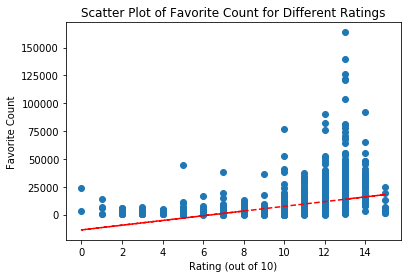

In [102]:
x = df6A.rating_numerator_clean
y = df6A.favorite_count
plt.scatter(x, y)
plt.title('Scatter Plot of Favorite Count for Different Ratings')
plt.xlabel('Rating (out of 10)')
plt.ylabel('Favorite Count')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

plt.show()

<font color=blue> 
### Insights, Part 2: Named Dogs vs Unnamed Dogs

My impression is that it is easier for viewers to connect with a dog with a name, so we will test to see if they have more likes on average.

As with Part 1 of our data analysis we should use df6A so that duplicates are removed.

Item 10 in the data cleaning section identifies whether or not the dog has a name.

In [103]:
yes_name = df6A.query("dog_has_name == 'Yes'")['rating_numerator_clean'].mean()
no_name = df6A.query("dog_has_name == 'No'")['rating_numerator_clean'].mean()

# next we need the averages so we can take the sum using a groupby and then dividing by the variables above

In [104]:
print(yes_name)
print(no_name)

10.710021321961621
10.270868824531517


<font color=blue> 
### Insights, Part 3: A Look at the Use of the Dog Label Terms

For this last analysis section I would like to get a general comparison at how often the terms 'doggo', 'floofer', 'puppo' and 'pupper' are used in the 'text column and how often they are used in the labels columns that was included with the data.

In [105]:
df6A_rows = df6A.shape[0]
doggo_in_text = []
floofer_in_text = []
pupper_in_text = []
puppo_in_text = []
empty_list = []
label_list = []

for text in range(df6A_rows):
    try:
        # what are we searching for?
        word1 = re.compile(r'doggo\s')
        # where are we searching?
        finding1 = word1.findall(df6A.text_section[text])
        label_list.append(finding1)
        word2 = re.compile(r'floofer\s')
        finding2 = word2.findall(df6A.text_section[text])
        label_list.append(finding2)
        word3 = re.compile(r'pupper\s')
        finding3 = word3.findall(df6A.text_section[text])
        label_list.append(finding3)
        word4 = re.compile(r'puppo\s')
        finding4 = word4.findall(df6A.text_section[text])
        label_list.append(finding4)
    except:
        empty_list.append('')

In [106]:
print('doggo:', label_list.count(['doggo ']))
print('floofer:', label_list.count(['floofer ']))
print('pupper:', label_list.count(['pupper ']))
print('puppo:', label_list.count(['puppo ']))

doggo: 40
floofer: 0
pupper: 75
puppo: 5


In [107]:
# Let's compare the figures above to the number of times they appears in the labels column.
df6A['dog_labels'].value_counts()

                     1688
pupper                203
doggo                  63
puppo                  22
doggo and pupper        9
floofer                 7
doggo and puppo         1
doggo and floofer       1
Name: dog_labels, dtype: int64

<font color=blue> 
### Insights, Part 4: Dog Breeds and Image Predictions

The neural network used to predict the dog breeds often predicted Chihuahua, Labrador retriever, and golden retriever.  Let's compare the accuracy for each of those three breeds on the first two attempts.

In [108]:
print(df6A.query("p1 == 'Chihuahua'")['p1_dog'].value_counts())
print(df6A.query("p1 == 'Labrador_retriever'")['p1_dog'].value_counts())
print(df6A.query("p1 == 'golden_retriever'")['p1_dog'].value_counts())

True    79
Name: p1_dog, dtype: int64
True    95
Name: p1_dog, dtype: int64
True    139
Name: p1_dog, dtype: int64


In [109]:
print(df6A.query("p2 == 'Chihuahua'")['p2_dog'].value_counts())
print(df6A.query("p2 == 'Labrador_retriever'")['p2_dog'].value_counts())
print(df6A.query("p2 == 'golden_retriever'")['p2_dog'].value_counts())

True    43
Name: p2_dog, dtype: int64
True    96
Name: p2_dog, dtype: int64
True    82
Name: p2_dog, dtype: int64
